# <center> Inteligencia Artificial y Aprendizaje </center> 
## <center> Práctica 2 </center> 
#### <center> *Ana San Román Gaitero y María González García* </center> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import model_selection
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("pima_indian_diabetes.csv") 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Tratamiento de datos previo

In [3]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.nan)

In [4]:
def outliers (datos): #Función z-score
    count=0
    lista=[]
    for i in data[datos]:
        if not (data[datos].mean()-2.5*data[datos].std())<=i<=(data[datos].mean()+2.5*data[datos].std()):
            if not np.isnan(i):
                count=count+1
                lista.append(i)
   
    return lista

In [5]:
for i in data:
    data[[i]]=data[[i]].replace(outliers(i),np.nan)

In [6]:
data.fillna(data.median(), inplace=True) 

## <center> Práctica 2 </center> 

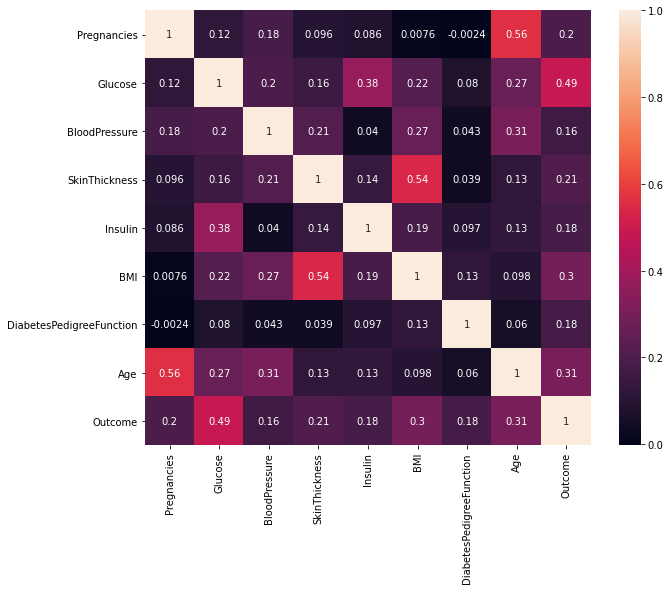

In [7]:
#Correlacion lineal
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [8]:
# Creamos el conjunto de entrada (x) y de salida (y)
x = data[["Pregnancies", "Glucose", "BloodPressure", "BMI", "Insulin", "DiabetesPedigreeFunction", "Age"]]
y = data["SkinThickness"]

x.shape, y.shape

((768, 7), (768,))

In [9]:
# Dividimos los datos en dos conjuntos: entrenamiento y test

x, y = shuffle(x,y,random_state=0) #los mezclamos poniendo random_state=0 para que no cambien los valores cada vez que se ejecuta
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=0)#Optamos por un 20% de los datos totales para test

## 2. Regresión lineal simple

In [10]:
X = X_train[['BMI']] #Variable con mayor coeficiente de correlación lineal. 

model=LinearRegression().fit(X,Y_train) #creo el modelo con regresion lineal

print("Coeficiente w1 =",model.coef_)
print("Coeficiente w0 =",model.intercept_)

y_pred=model.predict(X_test[['BMI']]) #predicción de los valores de y a partir de X_test

Coeficiente w1 = [0.71859097]
Coeficiente w0 = 5.762844601022913


\begin{equation}
y = 0.72x + 5.76
\end{equation}



In [11]:
model.score(X,Y_train) #Como se ajusta el modelo a los valores de entrada, como de bien el modelo explica los valores training

0.3105097725104131

In [12]:
model.score(X_test[['BMI']],Y_test) #Calcula el coeficiente de determinacion R2 

0.2207739753151845

In [13]:
r2_score(Y_test, y_pred) #Las prestaciones SIEMPRE se hacen en el conjunto test

0.2207739753151845

In [14]:
mean_squared_error(Y_test,y_pred) 

54.000140086093374

Viasualización gráfica del ajuste de los datos por medio de una regresión lineal

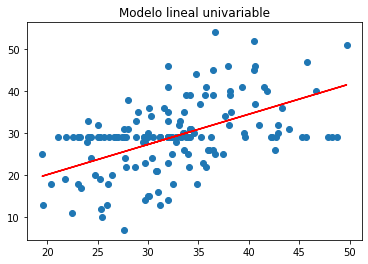

In [15]:
plt.scatter(X_test["BMI"], Y_test) 
plt.plot(X_test["BMI"], y_pred, color='red')
plt.title ("Modelo lineal univariable")
plt.show()

Los datos de test se ajustan ligeramente al modelo creado a partir de los datos de entremiento, por ello obtenemos un valor de error cuadrático medio bastante alto. 

#### Repetimos el proceso normalizando la variable X (test y train)

In [16]:
# Normalizamos la variable. El conjunto test no estaban, por lo que no conocemos su media. Por ello utilizo el scaler para
# estandarizar.
# normalizamos solo variable "x". No interesa darle al clínico el valor final (y) entre 0 y 1 

scaler = StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [17]:
X = X_train_norm[:,3:4] # BMI como variable elegida

model=LinearRegression().fit(X,Y_train)

print("Coeficiente w1 =",model.coef_)
print("Coeficiente w0 =",model.intercept_)

y_pred_rl_u_norm=model.predict(X_test_norm[:,3:4])

Coeficiente w1 = [4.54480991]
Coeficiente w0 = 28.822475570032573


Los coeficientes se han modificado tras la normalización. Tienen que ajustarse al nuevo rango en el que se encuentra la variable BMI.

\begin{equation}
y = 4.54x + 28.82
\end{equation}


In [18]:
model.score(X,Y_train)  #Ajuste del modelo

0.3105097725104131

In [19]:
r2_score(Y_test, y_pred)  # Sale exactamente el mismo valor, que sin normalizar. 

0.2207739753151845

In [20]:
mean_squared_error(Y_test,y_pred)

54.000140086093374

Al contar con una sola variable, no tenemos problema de que todas las variables estén en un mismo rango. Por ello, el error no se ve afectado. 

## 3. Regresión lineal múltiple

In [21]:
X = X_train[["BloodPressure","BMI"]]   # BloodPressure y BMI tienen el coeficiente de correlación más alto.
X2 = X_test[["BloodPressure","BMI"]]   # Probamos con 2 variables. 


model=LinearRegression().fit(X,Y_train) #Creacion del modelo

print("Coeficiente wi =",model.coef_)
print("Coeficiente w0 =",model.intercept_) #estima los valores de y mediante el modelo ya creado y los valores nuevos de test

y_pred=model.predict(X2) #
print (y_pred.shape)

Coeficiente wi = [0.05826609 0.69331158]
Coeficiente w0 = 2.3853566328370555
(154,)


\begin{equation}
y = 2.39 + 0.058 x_1 + 0.69 x_2
\end{equation}


In [22]:
model.score(X,Y_train) #como de bien se ajustan tus datos train a tu modelo  

0.31590040048159274

In [23]:
model.score(X2,Y_test) #como de bien se ajustan tus datos test a tu modelo coef de determinacion

0.2241645461672619

In [24]:
r2_score(Y_test, y_pred) #coef determinacion

0.2241645461672619

In [25]:
mean_squared_error(Y_test,y_pred) 

53.765174498210115

Viasualización gráfica del ajuste de los datos por medio de una regresión multivariable

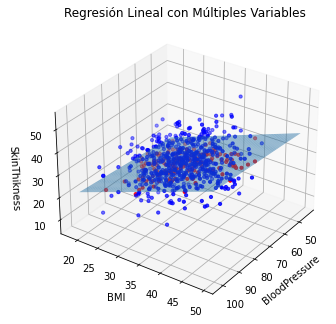

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
x1, x2 = np.meshgrid(np.linspace(np.min(X["BloodPressure"]), np.max(X["BloodPressure"]), num=100), np.linspace(np.min(X["BMI"]), np.max(X["BMI"]), num=100))
 
# calculamos los valores del plano para los puntos x e y
nuevoX1 = (model.coef_[0]*x1 )
nuevoX2 = (model.coef_[1]*x2 ) 
 
# calculamos los correspondientes valores para y. Debemos sumar el punto de intercepción
y = (nuevoX1 + nuevoX2 + model.intercept_)
 
# Graficamos el plano
ax.plot_surface(x1,x2,y, alpha=0.5)
 
# Graficamos en azul los puntos en 3D
ax.scatter(X["BloodPressure"], X["BMI"], Y_train, c='blue',s=10)
 
# Graficamos en rojo, los puntos que 
ax.scatter(X2["BloodPressure"], X2["BMI"], y_pred, c='red',s=10)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=35)
        
ax.set_xlabel('BloodPressure')
ax.set_ylabel('BMI')
ax.set_zlabel('SkinThikness')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

#### Repetimos el proceso normalizando la variable X (test y train)

In [27]:
#Normalizamos solo variable "x" para que todas las variables estén en un mismo rango

scaler = StandardScaler().fit(X)

X_train_norm = scaler.transform(X)
X_test_norm = scaler.transform(X2)

In [28]:
X = X_train_norm

model=LinearRegression().fit(X,Y_train)

print("Coeficientes wi =",model.coef_) #coefs diferentes pq se ajustan al nuevo rango
print("Coeficiente w0 =",model.intercept_)

y_pred=model.predict(X_test_norm) #valores estimados calculados a partir de x_test y del modelo ya entrenado

Coeficientes wi = [0.61979851 4.38492754]
Coeficiente w0 = 28.822475570032573


\begin{equation}
y = 28.82 + 0.62 x_1 + 4.38 x_2
\end{equation}


In [29]:
model.score(X_train_norm,Y_train) #Ajuste modelo

0.31590040048159274

In [30]:
r2_score(Y_test, y_pred) #coef determinacion, comparo valores reales con los estimados (siempre test)

0.22416454616726178

In [31]:
mean_squared_error(Y_test,y_pred) 

53.76517449821013

**Probamos con tres variables**

In [32]:
X = X_train[["BloodPressure","BMI","Glucose"]]   # BloodPressure, BMI y Glucose tienen el coeficiente de correlación más alto.
X2 = X_test[["BloodPressure","BMI","Glucose"]]   # Probamos con 3 variables. 


model=LinearRegression().fit(X,Y_train) #creo modelo

print("Coeficiente wi =",model.coef_)
print("Coeficiente w0 =",model.intercept_) 

y_pred=model.predict(X2)

Coeficiente wi = [0.05207271 0.67667211 0.01681618]
Coeficiente w0 = 1.3149802804138275


In [33]:
model.score(X,Y_train) #Ajuste modelo

0.3195452645311523

In [34]:
r2_score(Y_test, y_pred) 

0.21330123056158556

In [35]:
mean_squared_error(Y_test,y_pred) 

54.51799915488562

Se obtienen peores resultados con 3 variables. 

## 4. Regresión no lineal


Por medio de **cross-validation** se obtiene el grado del polinomio que mejor ajustaría al modelo (menor MSE)

In [36]:
X = X_train[["BMI","Pregnancies", "Age"]]
X2 = X_test[["BMI","Pregnancies", "Age"]]

crossvalidation = KFold(n_splits= 10, random_state=42, shuffle=True)

for i in range(1,8):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = LinearRegression().fit(X_current, Y_train) 
    scores = cross_val_score(model, X_current, Y_train, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 45.63563716240138, STD: 9.613859297412285
Degree-2 polynomial MSE: 45.485862166760185, STD: 10.074486282643594
Degree-3 polynomial MSE: 45.16615416175509, STD: 9.778954404171389
Degree-4 polynomial MSE: 47.13073896246213, STD: 9.7949131489799
Degree-5 polynomial MSE: 51.759668276185266, STD: 11.006454366676458
Degree-6 polynomial MSE: 93.98387163770045, STD: 69.17958799265818
Degree-7 polynomial MSE: 575.6407864162207, STD: 696.5518513579665


El grado del polinomio que mejor ajusta al modelo es 3 

In [37]:
poly_reg = PolynomialFeatures(degree=3) # Creación del polinomio de grado tres

X_poly = poly_reg.fit_transform(X) # crea una regresión polinómica de train
X_poly_test = poly_reg.fit_transform(X2) #crea regresion polinomica de test

pol_reg = LinearRegression().fit(X_poly, Y_train) #crea el modelo con la RPoli de train


print("Coeficientes wi =", pol_reg.coef_) # Tiene en cuenta la multiplicacion de variables: x1*x2...
print("Coeficiente w0 =", pol_reg.intercept_)

y_pred=pol_reg.predict(X_poly_test) #Calcula los valores estimados mediante el modelo y los x_test_reales
#y_test son los valores reales

Coeficientes wi = [ 0.00000000e+00 -5.95321230e+00  1.54966138e+00  1.72702101e+00
  2.24691211e-01 -8.28375014e-02 -8.34196076e-03  2.47949212e-01
 -4.76182867e-02 -3.17198967e-02 -2.18874881e-03 -8.22203879e-04
 -2.75293278e-04 -2.13705658e-03  3.67749446e-03  5.42788836e-05
 -3.63308614e-03 -1.74491620e-03 -7.83145884e-04  2.50790945e-04]
Coeficiente w0 = 46.06600645795239


In [38]:
pol_reg.score(X_poly,Y_train) # Ajuste modelo entrenamiento

0.36499636558705095

In [39]:
r2_score(Y_test, y_pred) #coef determinacion

0.25316338887298995

In [40]:
mean_squared_error(Y_test,y_pred) 

51.7555630134329

**Repetimos el proceso normalizando la variable X (test y train)**

In [41]:
#Normalizamos
scaler = StandardScaler().fit(X)
X_train_norm = scaler.transform(X)
X_test_norm = scaler.transform(X2)

In [42]:
crossvalidation = KFold(n_splits=10, random_state=42, shuffle=True)

for i in range(1,8):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X_train_norm)
    model = LinearRegression().fit(X_current, Y_train)
    scores = cross_val_score(model, X_current, Y_train, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 45.63563716240138, STD: 9.613859297412283
Degree-2 polynomial MSE: 45.48586216676012, STD: 10.07448628264363
Degree-3 polynomial MSE: 45.16615416173589, STD: 9.778954404134439
Degree-4 polynomial MSE: 47.13073897408401, STD: 9.794913144836805
Degree-5 polynomial MSE: 51.75966177095105, STD: 11.0064425110689
Degree-6 polynomial MSE: 94.13154445941092, STD: 69.5336601604037
Degree-7 polynomial MSE: 746.7627071254626, STD: 1176.7247577621774


In [43]:
poly_reg = PolynomialFeatures(degree=3) 

X_poly = poly_reg.fit_transform(X_train_norm)
X_poly_test = poly_reg.fit_transform(X_test_norm)

pol_reg = LinearRegression().fit(X_poly, Y_train)

print("Coeficientes wi =", pol_reg.coef_) 
print("Coeficiente w0 =", pol_reg.intercept_)

y_pred=pol_reg.predict(X_poly_test) 

Coeficientes wi = [ 0.          5.27909162  0.7583293   0.77129498  0.08597344 -0.63523412
 -0.6068205   0.79823628  0.23540079 -0.91987484 -0.55372971 -0.10145533
 -0.11410917 -0.1286189   0.74348192  0.036862   -0.10664927 -0.17206257
 -0.25940844  0.27905056]
Coeficiente w0 = 28.858549690939935


In [44]:
pol_reg.score(X_poly,Y_train) # Ha aumentado ligeramente (mejor ajuste)

0.3649963655870512

In [45]:
r2_score(Y_test, y_pred) # Ha aumentado ligeramente (mejor ajuste)

0.2531633888725111

In [46]:
mean_squared_error(Y_test,y_pred) # menor error, coherente. Las variables estan en el mismo rango

51.75556301346608

Algoritmo no tan robusto a los diferentes rangos entre variables, modelo variante. Mejores resultados normalizando, pero mínimos. 

## 5. Regresión Logística

In [47]:
# Creamos el conjunto de entrada (x) y de salida (y)

x = data[["Glucose", "BMI","Age"]]
y = data["Outcome"] 

In [48]:
x, y = shuffle(x,y,random_state=0) #los mezclamos
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=0)#Optamos por un 20% de los datos totales para test

In [49]:
model= LogisticRegression().fit(X_train, Y_train) #creamos el modelo logit
y_pred = model.predict(X_test)#calculamos los valres estimados

In [50]:
print("Coeficientes wi =", model.coef_) # Variable más importante: BMI (wi mayor)
print("Coeficiente w0 =", model.intercept_) 

Coeficientes wi = [[0.03760296 0.08536416 0.054139  ]]
Coeficiente w0 = [-9.99131912]


In [51]:
print("Accuracy:",accuracy_score(Y_test, y_pred)) #tasa de acierto
print("Sensibility:",recall_score(Y_test, y_pred)) 

Accuracy: 0.7467532467532467
Sensibility: 0.559322033898305


- Accuracy: tasa de acierto. Hay un 75% de posibilidades de clasificar bien. 
- Sensibility: la capacidad de nuestro estimador para dar como casos positivos los casos realmente enfermos; proporción de enfermos correctamente identificados. Hay un 56% de posibilidades de que el algoritmo detecte correctamente a los diabéticos. 

In [52]:
print(confusion_matrix(Y_test, y_pred))

[[82 13]
 [26 33]]


- 82 verdaderos negativo (verdaderos no diabéticos)
- 13 falsos positivos (falsos diabéticos)
- 26 falso negativo (falso no diabéticos)
- 33 verdadero positivo (verdadero diabéticos)

In [53]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        95
           1       0.72      0.56      0.63        59

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



- En la **clase 0** tenemos menor precisión y mayor recall, por lo tanto nuestro algoritmo detecta bien la clase,  pero también incluye muestras de la otra clase.

- En la **clase 1** por el contrario tenemos mayor precisión y menor recall, por tanto nuestro modelo no detecta la clase muy bien, pero cuando lo hace es medianamente confiable.


**Repetimos el proceso normalizando la variable X (test y train)**

In [54]:
escalar = StandardScaler()
X_norm_train = escalar.fit_transform(X_train)
X_norm_test = escalar.transform(X_test)

model= LogisticRegression().fit(X_norm_train, Y_train)
y_pred = model.predict(X_norm_test)

In [55]:
print("Coeficientes wi =", model.coef_) # Variable más importante: Glucosa (wi mayor)
print("Coeficiente w0 =", model.intercept_) 

Coeficientes wi = [[1.12719893 0.5331819  0.55466178]]
Coeficiente w0 = [-0.91978067]


In [56]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Sensibility:",recall_score(Y_test, y_pred))

Accuracy: 0.7467532467532467
Sensibility: 0.559322033898305


In [57]:
print(confusion_matrix(Y_test, y_pred))

[[82 13]
 [26 33]]


In [58]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        95
           1       0.72      0.56      0.63        59

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



Se observa un ligero aumento de la precisión y de la sensibilidad en la clase 1 (no diabeticos)

## 6. Comparación de los resultados obtenidos con los distintos clasificadores

- **R^2** : Coeficiente de determinación                        
- **MSE** : Error cuadrático medio
- **Accuracy** : Precisión 
- **Sensibility** : Sensibilidad 
- **RLU** : Regresión Lineal Univariable
  + Vector de característica: BMI
  + Etiqueta asociada al vector de características: SkinThickness
- **RLU norm** : Regresión Lineal Univariable normalizada
- **RLM** : Regresión Lineal Multivariable
  + Vector de característica: BMI, BloodPresure
  + Etiqueta asociada al vector de características: SkinThickness
- **RLM norm** : Regresión Lineal Multivariable normalizada
- **RNL** : Regresión no Lineal 
  + Vector de característica: BMI, Pregnancie, Age
  + Etiqueta asociada al vector de características: SkinThickness
- **RNL norm** : Regresión no Lineal normalizada
- **RLog** : Regresión Logística
  + Vector de característica: Glucose, Age, BMI
  + Etiqueta asociada al vector de características: Outcome
- **RLog norm** : Regresión Logística normalizada

Todas los modelos con datos normalizados han sido realizados con el mismo vector de características y etiquetas para comparar con sus respectivos modelos sin normalizar. 

Se han elegido aquellas variables de entrada que han obtenido mejores resultados en las prestaciones del conjunto de test.

In [59]:
Tabla = pd.DataFrame({ "Prestaciones":["R^2","MSE","Accuracy","Sensibility"],
                      "RLU" : ["0.2207739753151845","54.000140086093374","-","-"],
                      "RLU norm" : ["0.2207739753151845","54.000140086093374","-","-"],
                      "RLM" : ["0.2241645461672619","53.765174498210115","-","-"], 
                      "RLM norm" : ["0.22416454616726178","53.76517449821013","-","-"],
                      "RNL" : ["0.25316338887298995","51.7555630134329","-","-"],
                      "RNL norm" : ["0.2531633888725111","51.75556301346608","-","-"],
                     "RLog " : ["-","-","0.7467532467532467", "0.559322033898305"],
                     "RLog norm":["-","-","0.7467532467532467","0.559322033898305"]})

Las prestaciones que se muestran a continuación en la tabla han sido obtenidas en los anteriores apartados. 

In [60]:
Tabla

,Prestaciones,RLU,RLU norm,RLM,RLM norm,RNL,RNL norm,RLog,RLog norm
0,R^2,0.2207739753151845,0.2207739753151845,0.2241645461672619,0.22416454616726178,0.25316338887298995,0.2531633888725111,-,-
1,MSE,54.000140086093374,54.000140086093374,53.765174498210115,53.76517449821013,51.7555630134329,51.75556301346608,-,-
2,Accuracy,-,-,-,-,-,-,0.7467532467532467,0.7467532467532467
3,Sensibility,-,-,-,-,-,-,0.559322033898305,0.559322033898305


En la Regresión Lineal Univariable, Multivariable y Regresión no Lineal se utilizan el coeficiente de determinación y el error cuadrático medio para evaluar el modelo ya que son problemas de regresión. En cambio, en Regresión Logística no tiene sentido basarse en esas prestaciones ya que se trata de un problema de clasificación, por lo que se utilizará el Accuracy y la Sensibilidad 

En primer lugar, se observa que no hay ninguna variación en las prestaciones de la Regresión Lineal Univariable con/sin normalizar. Esto es debido a que el modelo cuenta con una sola variable de entrada (BMI). Sin embargo, en Regresión Lineal Multivariable al contar con más de una variable se pueden encontrar problemas con los distintos rangos dinámicos. Es por ello, que se pueden observar ligeros cambios en las prestaciones. Además, al normalizar, el modelo consigue dar mayor peso a la variable más importante.

Lo mismo sucede con el resto de regresiones ya que cuentan con más de una variable.


**a) Justifique razonadamente si utilizaría un esquema paramétrico lineal o no lineal.**

En un previo análisis visual de los datos de test se puede intuir que la regresión lineal no será la más adecuada ya que los datos siguen una disposición lineal.

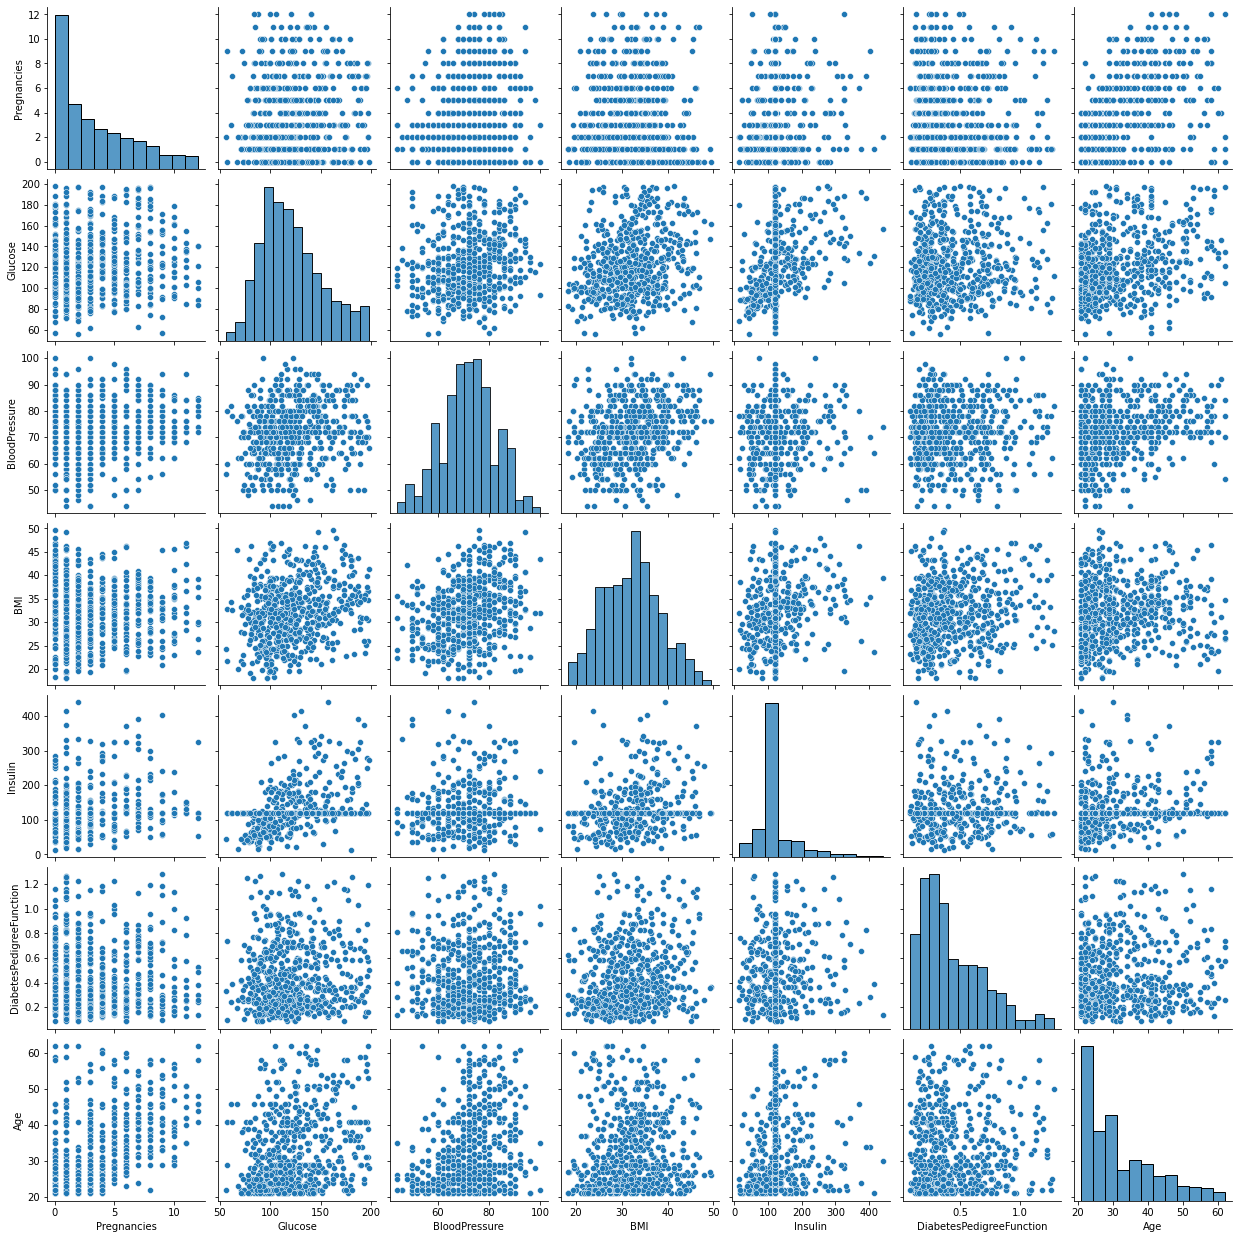

In [61]:
x = data[["Pregnancies", "Glucose", "BloodPressure", "BMI", "Insulin", "DiabetesPedigreeFunction", "Age"]]
y = data["SkinThickness"]
x, y = shuffle(x,y, random_state=0) #los mezclamos
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sns.pairplot(X_train); 

Basándose en los resultados de las prestaciones obtenidas, descritas en la tabla superior, el esquema paramétrico más adecuado a nuestros datos de test es el no lineal ya que su MSE, la diferencia entre el valor real y el predicho, es menor y su $R^2$, la proporción de la variación de la variable "y" explicada a partir de la variable "x", es mayor.

Por lo tanto, el modelo no lineal se ajusta mejor a los datos.

**b) Justifique con qué esqumea de los analizados se obtiene mejores prestaciones en el conjunto de test.**

- Regresión Lineal Univariable / Multivariable

Al haber varias variables que son importantes para la determinación de la variable dependiente, en nuestro caso SkinThickness, obtenemos mejores prestaciones por medio de un modelo lineal multivariable. En este caso BloodPressure y BMI son las carcaterísticas que mejor definen a SkinThickness, además de tener el mayor coeficiente de correlación lineal con respecto a la variable objetivo.

- Regresión Lineal Multivariable / no Lineal

Explicado en el anterior apartado. Se obtienen mejores prestaciones con un modelo no lineal. 

- Regresion no Lineal / Logística

Cabe destacar que estas regresiones no se pueden comparar entre sí dado que, aunque son dos problemas de aprendizaje supervisado, el primero tiene como objetivo predecir una variable continua (SkinThickness) y el segundo, conocer si un determinado paciente con unas determinadas caracteristicas, es más probable de ser diabético o no diabético (variable discreta).  

Se puede concluir que el modelo que obtiene mejores prestaciones en el conjunto de test es la Regresión no Lineal normalizada cuando *SkinThickness* es la variable objetivo y la Regresión Logística para la clasificación de *Outcome*.

**c) Justifique razonadamente si el hecho de hacer una única partición de los casos en los conjuntos de entrenamiento y test puede influir en los resultados obtenidos.**

Al hacer una única partición de los casos en los conjuntos de entrenamiento y test los resultados obtenidos no van a definir correctamente a la población, dado que van a estar condicionados a la suerte de la primera realización/partición. Por ello, para la elección del modelo que mejor define a los datos, es necesario realizar varias particiones, obteniendo tantas prestaciones como particiones haya y devolviendo los valores medios $±$ desviaciones estándar de las prestaciones. 

**d) Partiendo de los datos originales, realice una nueva partición de los de los casos en los conjuntos de entrenamiento y test. Seleccione uno de los clasificadores analizados (indique el clasificador escogido) y obtenga de nuevo la matriz de confusión y las medidas de evaluación. Comente los resultados obtenidos.**

El clasificador escogido es la Regresión Logística.

In [62]:
#Se realiza una nueva partición de los datos en train y test
x = data[["Glucose", "BMI","Age"]]
y = data["Outcome"]
x, y = shuffle(x,y, random_state=2) #los mezclamos
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)#Optamos por un 20% de los datos totales para test

#Se normaliza
escalar = StandardScaler()
X_norm_train = escalar.fit_transform(X_train)
X_norm_test = escalar.transform(X_test)

#Creación del modelo escogido
model= LogisticRegression().fit(X_norm_train, Y_train)
y_pred = model.predict(X_norm_test)

print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Sensibility:",recall_score(Y_test, y_pred))

Accuracy: 0.8116883116883117
Sensibility: 0.6470588235294118


- Accuracy: tasa de acierto. Hay un 81% de posibilidades de clasificar bien.
- Sensibility: la capacidad de nuestro estimador para dar como casos positivos los casos realmente enfermos; proporción de enfermos correctamente identificados. Hay un 65% de posibilidades de que el algoritmo detecte correctamente a los diabéticos

In [63]:
print(confusion_matrix(Y_test, y_pred))

[[92 11]
 [18 33]]


- 92 verdaderos negativos (verdaderos no diabéticos)
- 11 falsos positivos (falsos diabéticos)
- 18 falsos negativos (falsos no diabéticos)
- 33 verdaderos positivos (verdaderos diabéticos)

Mediante los valores obtenidos en la siguiente tabla, podemos concluir que nuestro algoritmo detecta con una mayor probabilidad a los no diabéticos que a los diabéticos. Lo cual es un resultado esperado ya que las clases están desbalanceadas y el algoritmo va a aprender de la clase 0 y memorizar más a la clase 1. 

A partir de esta tabla de confusión se pueden calcular varias medidas de prestación como la precisión, sensibilidad, f1-score etc.

Se comparan los resultados con particiones diferentes.

In [64]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibility"],
                      "RLog_1" : ["0.7467532467532467","0.559322033898305"],
                      "RLog_2" : ["0.8116883116883117","0.6470588235294118"]})
Tabla

,Prestaciones,RLog_1,RLog_2
0,Accuracy,0.7467532467532467,0.8116883116883117
1,Sensibility,0.559322033898305,0.6470588235294118


Con esta nueva partición se han obtenido mejores resultados en ambas prestaciones de test. Esto se debe a que estamos creando el modelo con otro conjunto de datos aleatorios de train y de test. Por tanto, se puede concluir que cada vez que se hagan nuevas particiones se obtendrán resultados diferentes y que con una única partición no somos capaces de definir la población.

A partir de esta tabla se puede observar como se obtienen diferentes prestaciones dependiendo de la partición. Por ello, lo más lógico sería devolver el accuracy y la sensibilidad como el valor medio ± desviaciones estándar de todas las particiones realizadas. 

In [65]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibility"],
                      "RLog_2 prestaciones" : ["0.7792207792207793 ± 0.03246753246753248","0.6031904287138584 ± 0.04386839481555338"]})

In [66]:
Tabla

,Prestaciones,RLog_2 prestaciones
0,Accuracy,0.7792207792207793 ± 0.03246753246753248
1,Sensibility,0.6031904287138584 ± 0.04386839481555338


Esto sería un ejemplo de como se deberían mostrar las prestaciones para la evaluación final de éstas.